# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response["data"]["1"]["quotes"]["CAD"]["price"]

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response["data"]["1027"]["quotes"]["CAD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $63808.83
The current value of your 5.3 ETH is $19976.57


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_investments = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    limit=1000
).df

# Preview DataFrame
df_investments.head()

AGG                                         \
                             open      high       low    close    volume   
time                                                                       
2020-05-01 00:00:00-04:00  116.97  117.0998  116.6775  116.900  11778582   
2020-05-04 00:00:00-04:00  116.89  117.0900  116.8700  116.975   6950122   
2020-05-05 00:00:00-04:00  116.96  116.9700  116.8100  116.880   7315932   
2020-05-06 00:00:00-04:00  116.44  116.7100  116.3000  116.450   9313368   
2020-05-07 00:00:00-04:00  116.61  116.7600  116.4200  116.730   7338194   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2020-05-01 00:00:00-04:00  285.31  290.6572  281.52  282.73  111321036  
2020-05-04 00:00:00-04:00  280.74  283.9000  279.13  283.66   70199660  
2020-05-05 00:00:00-04:00  286.64  289.2500  285.75  286.22   72232658  
2020-05-06 00:00:00-04:00  288.04  288.4600  283.78  284.29   65371977  
2020-05-07 00:00:00-04:00  287.75  289.7800  287.13  287.70   68883538

In [10]:
# Pick AGG and SPY close prices
agg_closing_price = float(df_investments["AGG"]["close"][0])
spy_closing_price = float(df_investments["SPY"]["close"][0])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_closing_price}")
print(f"Current SPY closing price: ${spy_closing_price}")

Current AGG closing price: $116.9
Current SPY closing price: $282.73


In [11]:
# Compute the current value of shares
my_spy_value = my_spy * spy_closing_price
my_agg_value = my_agg * agg_closing_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $14136.50
The current value of your 200 AGG shares is $23380.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data = [
    my_btc_value + my_eth_value,
    my_spy_value + my_agg_value,
]

# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, columns=["amount"], index=["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,83785.391869
shares,37516.500000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

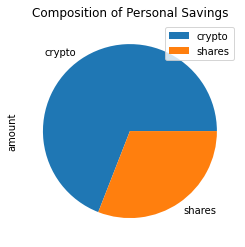

In [13]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Great, You have saved three times your monthly expenses! Keep pushing to increase your savings.")
else:
    print(f"You are ${(emergency_fund - total_savings):0.2f} away from your emergency fund goal, continue saving between 10% and 20% of your monthly income to reach your goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [18]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002973,0.992522,0.990830,1.000092,1.004910,1.005777,1.007536,1.004000,1.003469,1.001739,...,1.003232,1.001007,1.012671,1.004456,0.994850,1.004186,1.017291,1.003485,1.013741,1.003718
2,1.003988,0.987928,1.001229,0.997219,0.998068,1.006375,0.996414,0.996041,0.993749,1.002611,...,1.013051,0.996909,0.998190,1.014521,0.994759,0.991991,1.013554,1.011677,1.012093,1.007804
3,1.007965,0.984823,1.008392,1.004529,0.990895,1.021718,0.994251,1.005534,1.008005,1.002479,...,1.011041,0.995818,1.006518,1.022215,1.000998,0.991478,1.012904,0.996894,1.021899,1.006485
4,1.002476,0.990225,1.004087,1.002578,0.995294,1.016004,0.997518,1.007969,0.999219,1.000010,...,1.001035,0.993670,1.017983,1.016421,1.007639,0.987171,1.003375,1.000333,1.018035,0.986305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,25.296467,7.498447,62.226486,13.743092,72.120133,8.716480,11.927280,9.654044,18.485100,29.973096,...,9.872321,14.576794,53.505344,16.156956,16.660200,41.684039,18.353369,14.502911,9.193036,9.402558
7557,25.302962,7.407467,62.797537,13.645307,71.182548,8.898137,11.976107,9.716986,18.614482,30.263646,...,9.842581,14.470094,54.038418,16.404154,16.743310,42.026642,18.401016,14.474534,9.225305,9.488491
7558,25.335726,7.526964,63.612011,13.612166,71.122279,8.919892,11.875757,9.595355,18.571244,29.680316,...,9.747126,14.596633,54.651499,16.338384,16.721893,41.529998,18.240648,14.585509,9.344317,9.578922
7559,25.137549,7.551901,63.654389,13.529676,70.528111,8.962421,11.870686,9.610498,18.521800,29.420431,...,9.769452,14.677905,54.412136,16.199728,16.921082,41.241646,18.345109,14.659089,9.458438,9.495937


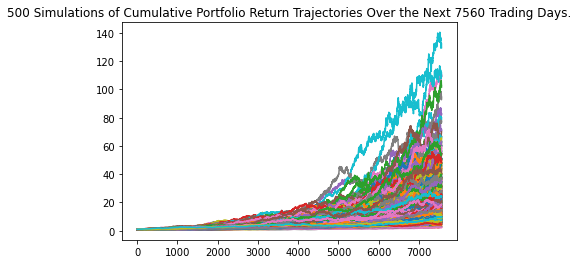

In [20]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

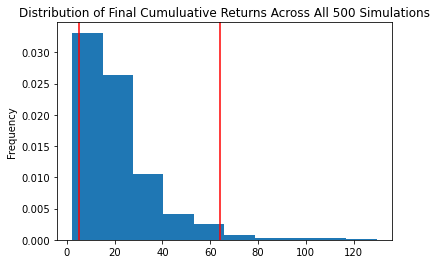

In [22]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             21.815794
std              16.733154
min               2.209835
25%              10.575038
50%              17.432806
75%              26.667161
max             129.613256
95% CI Lower      5.013697
95% CI Upper     64.281570
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $100273.94 and $1285631.4


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [26]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $150410.91 and $1928447.09
